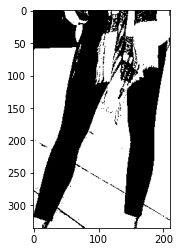

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../DATA/pants.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [3]:
#== Parameters           
BLUR = 21
CANNY_THRESH_1 = 100
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (1.0,1.0,1.0) # In BGR format

img = cv2.imread('../DATA/pants.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)

contour_info = []
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

#-- Smooth mask, then blur it
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background
mask_stack  = mask_stack.astype('float32') / 255.0         
img         = img.astype('float32') / 255.0  
#plt.imshow(img, cmap='gray')
masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR)  
masked = (masked * 255).astype('uint8')                    

cv2.imshow('img', masked)
#.imshow('img', masked)                                   # Display
cv2.waitKey()
cv2.imwrite("WTF.jpg",masked)



True